# LSTM (Long Short-Term Memory) Neural Network

### Import modules

In [1]:
import pandas as pd
import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

Using TensorFlow backend.


### Read in our dataframe and print the head

In [103]:
df = pd.read_csv('data/tableX_5.csv')
df.fillna(0, inplace = True)

print(df.head())

   activity  appCat.builtin  appCat.communication  appCat.entertainment  \
0  0.145854       3981.1194            14180.4480             1733.6148   
1  0.134836       3763.6968            16751.9910             1513.7718   
2  0.138201       4233.9702            21617.1042             1344.1818   
3  0.131653       3050.9376            23241.8220             1285.9956   
4  0.116179       3349.6764            24425.9784             1613.6046   

   appCat.office  appCat.other  appCat.social  appCat.travel  appCat.unknown  \
0       280.7448      293.1720      5245.7394      1567.0596        205.7616   
1       179.2272      293.1720      5928.1968      1269.6756        328.8342   
2       172.6326      393.6564      6595.2408      1028.1786        442.8642   
3       123.5976      308.3046      6645.3762       510.3726        465.1764   
4       231.2622      284.5380      6942.8256       516.3780        490.3914   

   appCat.utilities  call  circumplex.arousal  circumplex.valence  m

### Convert data/target into numpy arrays

In [104]:
target = np.array(df['target_mood'], dtype = float)
del df['target_mood']
del df['patientno']
del df['period']
data = np.array(df, dtype = float)

### Show data/target shapes

In [105]:
print(data.shape)
print(target.shape)

(43, 16)
(43,)


### Split test/train datasets (set random_state for seeding)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

### LSTM RNN model

In [107]:
rnn = Sequential()
rnn.add(LSTM((1), input_shape = (None, 16), return_sequences = False))
rnn.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1)                 72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


### Fit the model and save it for re-training/fine-tuning later

In [108]:
history = rnn.fit(x_train, y_train, epochs=150, validation_data = (x_test, y_test))

Train on 34 samples, validate on 9 samples
Epoch 1/150
34/34 [==============================] - 2s 48ms/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 2/150
34/34 [==============================] - 0s 164us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 3/150
34/34 [==============================] - 0s 145us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 4/150
34/34 [==============================] - 0s 211us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 5/150
34/34 [==============================] - 0s 292us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 6/150
34/34 [==============================] - 0s 250us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 7/150
34/34 [==============================] - 0s 192us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 

34/34 [==============================] - 0s 151us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 59/150
34/34 [==============================] - 0s 124us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 60/150
34/34 [==============================] - 0s 299us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 61/150
34/34 [==============================] - 0s 464us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 62/150
34/34 [==============================] - 0s 265us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 63/150
34/34 [==============================] - 0s 297us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 64/150
34/34 [==============================] - 0s 231us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 65/150
34/34 

34/34 [==============================] - 0s 188us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 116/150
34/34 [==============================] - 0s 157us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 117/150
34/34 [==============================] - 0s 259us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 118/150
34/34 [==============================] - 0s 180us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 119/150
34/34 [==============================] - 0s 327us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 120/150
34/34 [==============================] - 0s 135us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 121/150
34/34 [==============================] - 0s 306us/step - loss: 7.1456 - acc: 0.0000e+00 - val_loss: 7.0889 - val_acc: 0.0000e+00
Epoch 122/150

### Predict x-test and plot against y-test

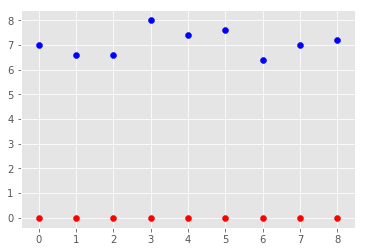

In [110]:
results = rnn.predict(x_test)
# print(len(results), len(y_test))

############ FIX THIS ############
plt.scatter(range(9), results, c='r')
plt.scatter(range(9), y_test, c='b')
plt.show()

### Plot the loss from our history

In [ ]:
plt.plot(history.history['loss'])
plt.show()